# SrTiO<sub>3</sub>

In this example, we extract the self-energies and Eliashberg function from a 2DEL in the $d_{xy}$ bands on the $\rm{TiO}_{2}$-terminated surface of $\rm{SrTiO}_3$.

In [ ]:
%load_ext autoreload
%autoreload 2

# Necessary packages
import xarpes
import matplotlib.pyplot as plt
import os

# Default plot configuration from xarpes.plotting.py
xarpes.plot_settings('default')

In [ ]:
script_dir = xarpes.set_script_dir()

dfld = 'data_sets' # Folder containing the data
flnm = 'STO_2_0010STO_2_' # Name of the file
extn = '.ibw' # Extension of the file

data_file_path = os.path.join(script_dir, dfld, flnm + extn)

The following cell instantiates band map class object based on the Igor Binary Wave (ibw) file. The subsequent cell illustrates how a band map object could be instantiated with NumPy arrays instead. Only one of the cells will have to be executed to populate the band map object.

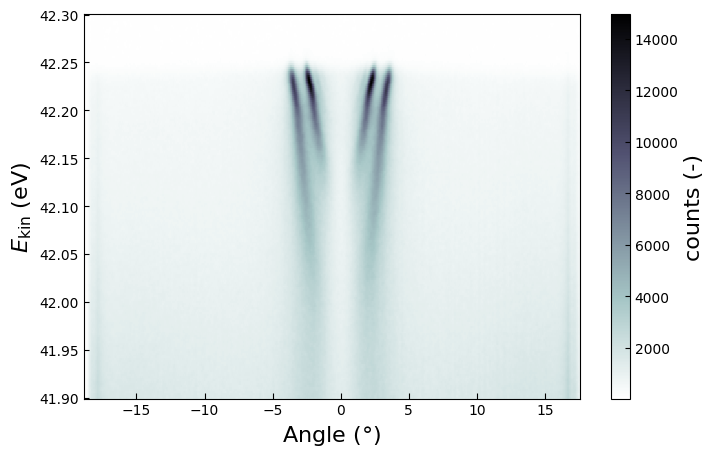

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(8, 5)); ax = fig.gca()

bmap = xarpes.BandMap.from_ibw_file(data_file_path, energy_resolution=0.01,
                      angle_resolution=0.2, temperature=20)

bmap.shift_angles(shift=-0.57)

fig = bmap.plot(abscissa='angle', ordinate='kinetic_energy', ax=ax)

In [ ]:
# %matplotlib inline

# import numpy as np

# intensities= np.load(os.path.join(dfld, "STO_2_0010STO_2_intensities.npy"))
# angles = np.load(os.path.join(dfld, "STO_2_0010STO_2_angles.npy"))
# ekin = np.load(os.path.join(dfld, "STO_2_0010STO_2_ekin.npy"))

# bmap = xarpes.BandMap.from_ibw_file(data_file_path, energy_resolution=0.01,
#                       angle_resolution=0.2, temperature=20)

# bmap.shift_angles(shift=-0.57)

# fig = plt.figure(figsize=(8, 5)); ax = fig.gca()

# fig = bmap.plot(abscissa='angle', ordinate='kinetic_energy', ax=ax)

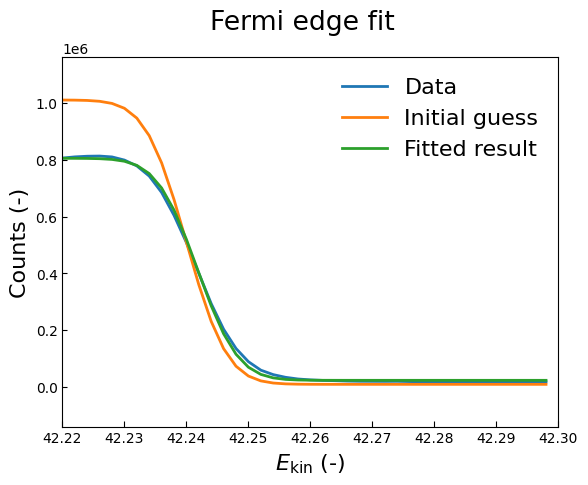

In [ ]:
%matplotlib inline

fig = bmap.fit_fermi_edge(hnuminPhi_guess=42.24, background_guess=1e4,
                          integrated_weight_guess=1e6, angle_min=-5,
                          angle_max=5, ekin_min=42.22, ekin_max=42.3,
                          show=True, title='Fermi edge fit')

print('The optimised h nu - Phi = ' + f'{bmap.hnuminPhi:.4f}' + ' +/- '
      + f'{bmap.hnuminPhi_std:.4f}' + ' eV.')

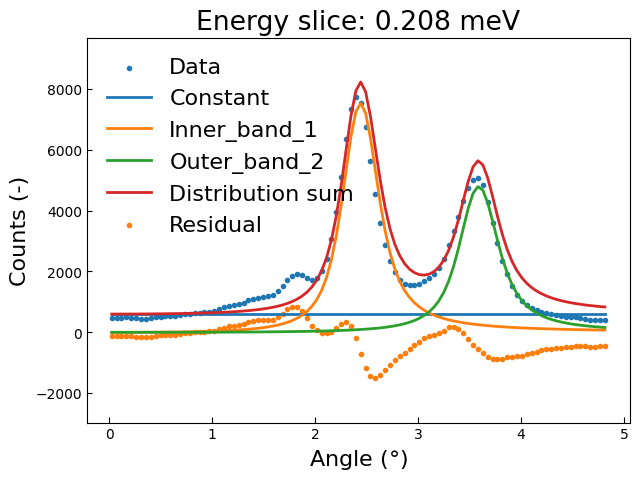

In [ ]:
%matplotlib inline

k_0 = -0.0014 # 0.02
theta_0 = 0

guess_dists = xarpes.CreateDistributions([
xarpes.Constant(offset=600),
xarpes.SpectralQuadratic(amplitude=3800, peak=-2.45, broadening=0.00024,
            center_wavevector=k_0, name='Inner_band', index='1'),
xarpes.SpectralQuadratic(amplitude=1800, peak=-3.6, broadening=0.0004,
            center_wavevector=k_0, name='Outer_band', index='2')
])

import numpy as np

mat_el = lambda x: np.sin(np.deg2rad(x - theta_0)) ** 2

mat_args = {}

energy_range = [-0.1, 0.003]
angle_min = 0.0
angle_max = 4.8

mdcs = xarpes.MDCs(*bmap.mdc_set(angle_min, angle_max, energy_range=energy_range))

fig = plt.figure(figsize=(7, 5)); ax = fig.gca()

fig = mdcs.visualize_guess(distributions=guess_dists, matrix_element=mat_el,
                           matrix_args=mat_args, energy_value=-0.000, ax=ax)

**Note on interactive figures**
- The interactive figure might not work inside the Jupyter notebooks, despite our best efforts to ensure stability.
- As a fallback, the user may switch from "%matplotlib widget" to "%matplotlib qt", after which the figure should pop up in an external window.
- For some package versions, a static version of the interactive widget may spuriously show up inside other cells. In that case, uncomment the #get_ipython()... line in the first cell for your notebooks.

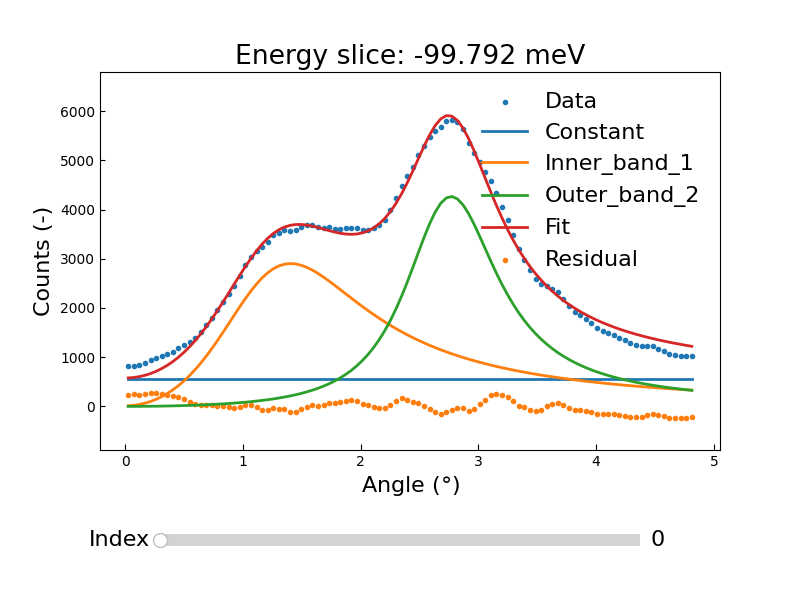

In [ ]:
%matplotlib widget    

fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

fig = mdcs.fit_selection(distributions=guess_dists, matrix_element=mat_el, 
                         matrix_args=mat_args, ax=ax)

**Note on the self-energy assignment**
- The user has to explicitly assign the peaks as left-hand or right-hand side.  
- In theory, one could incorporate such information in a minus sign of the peak position.  
- However, this would also require setting boundaries for the fitting range.  
- Instead, the user is advised to carefully check correspondence of peak maxima with MDC fitting results.

In [ ]:
self_energy = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='Inner_band_1', 
                                bare_mass=0.58997502, fermi_wavevector=0.1411192, side='right'))

self_two = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='Outer_band_2',
                                bare_mass=0.6, fermi_wavevector=0.207))

self_two.side='right'

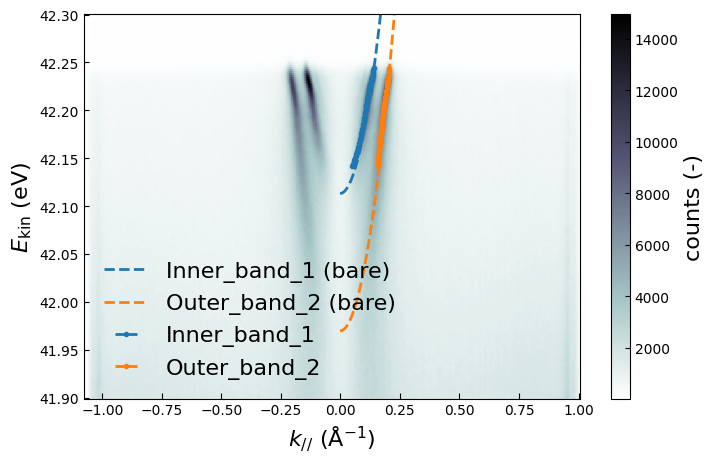

In [ ]:
%matplotlib inline

self_energies = xarpes.CreateSelfEnergies([self_energy, self_two])

fig = plt.figure(figsize=(8, 5)); ax = fig.gca()

fig = bmap.plot(abscissa='momentum', ordinate='kinetic_energy', 
                plot_dispersions='domain', 
                self_energies=self_energies, ax=ax)

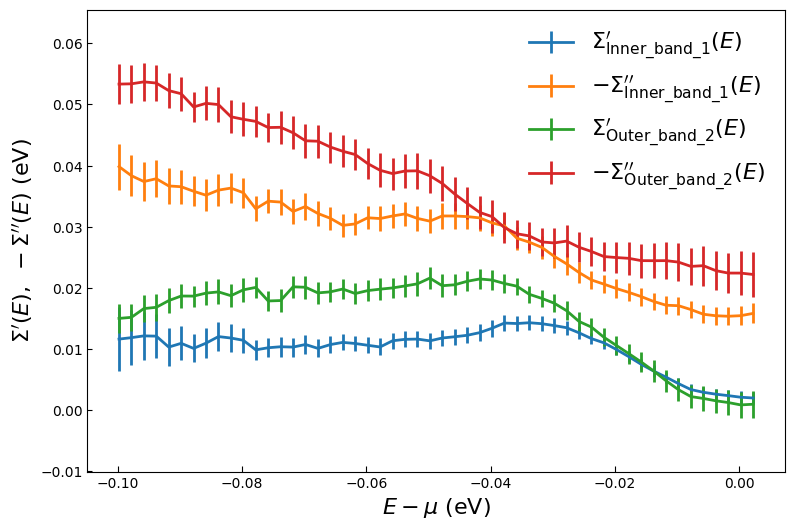

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(9, 6)); ax = fig.gca()

self_energy.plot_both(ax=ax, show=False, fig_close=False)
self_two.plot_both(ax=ax, show=False, fig_close=False)

plt.legend(); plt.show()

In [ ]:
%matplotlib inline

guess_dists = xarpes.CreateDistributions([
xarpes.Constant(offset=600),

xarpes.SpectralQuadratic(amplitude=8, peak=2.45, broadening=0.00024,
            center_wavevector=k_0, name='Inner_nm', index='1'),

xarpes.SpectralQuadratic(amplitude=8, peak=3.6, broadening=0.0004,
            center_wavevector=k_0, name='Outer_nm', index='2')
])

energy_range = [-0.1, 0.003]
angle_min=-5.0
angle_max=0.0

mdcs = xarpes.MDCs(*bmap.mdc_set(angle_min, angle_max, energy_range=energy_range))

fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

fig = mdcs.visualize_guess(distributions=guess_dists, ax=ax, energy_value=0)

In [ ]:
%matplotlib widget

fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

fig = mdcs.fit_selection(distributions=guess_dists, ax=ax)

In [ ]:
self_three = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='Inner_nm_1', side='left',
                                bare_mass=0.5, fermi_wavevector=0.142))

self_four = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='Outer_nm_2', side='left',
                                bare_mass=0.62, fermi_wavevector=0.207))

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

self_total = xarpes.CreateSelfEnergies([
    self_energy, self_two,
    self_three, self_four
])

fig = bmap.plot(abscissa='momentum', ordinate='electron_energy', ax=ax, 
                self_energies=self_total, plot_dispersions='domain')

In [ ]:
%matplotlib inline

guess_dists = xarpes.CreateDistributions([
xarpes.Constant(offset=600),
xarpes.SpectralQuadratic(amplitude=3600, peak=-2.45, broadening=0.00024,
            center_wavevector=k_0, name='Inner_left', index='5'),
xarpes.SpectralQuadratic(amplitude=1800, peak=-3.6, broadening=0.0004,
            center_wavevector=k_0, name='Outer_left', index='6')
])

mat_el = lambda x: np.sin(np.deg2rad(x - theta_0)) ** 2

mat_args = {}

energy_range = [-0.1, 0.003]
angle_min=-5.0
angle_max=0.0


mdcs = xarpes.MDCs(*bmap.mdc_set(angle_min, angle_max, energy_range=energy_range))

fig = plt.figure(figsize=(7, 5)); ax = fig.gca()

fig = mdcs.visualize_guess(distributions=guess_dists, matrix_element=mat_el,
                           matrix_args=mat_args, energy_value=0.000, ax=ax)

In [ ]:
%matplotlib widget    

fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

fig = mdcs.fit_selection(distributions=guess_dists, matrix_element=mat_el, 
                         matrix_args=mat_args, ax=ax)

In [ ]:
self_five = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='Inner_left_5',
                                bare_mass=0.59521794, fermi_wavevector=0.141069758, side='left'))

self_six = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='Outer_left_6', 
                                bare_mass=0.58997502, fermi_wavevector=0.1411192, side='left'))

self_five.plot_both()

In [ ]:
%matplotlib inline

fig, ax = plt.subplots(2, 1, figsize=(6, 8))

fig, spectrum, model, omega_range, aval_select = self_energy.extract_a2f(
                                omega_min=0.5, omega_max=120, omega_num=250, 
                                omega_I=20, omega_M=100, omega_S=1.0, aval_min=0.0,
                                aval_max=8.0, aval_num=10, parts='both',
                                ecut_left=3.0, h_n=0.0741008, impurity_magnitude=16.475007,
                                ax=ax[0], show=False, fig_close=False)

fig, spectrum_left, model, omega_range, aval_select = self_five.extract_a2f(
                                omega_min=0.5, omega_max=120, omega_num=250, 
                                omega_I=20, omega_M=100, omega_S=1.0, aval_min=0.0,
                                aval_max=8.0, aval_num=10, parts='both',
                                ecut_left=3.0, h_n=0.0743720, impurity_magnitude=15.882396,
                                ax=ax[1], show=False, fig_close=False)

# Figure customization
ax[0].set_xlabel(''); ax[0].set_xticklabels([])
ax[0].set_title('$\chi^2$-kink')
fig.subplots_adjust(top=0.92, hspace=0.1)
plt.show()

In [ ]:
with xarpes.trim_notebook_output(print_lines=10):
    spectrum, model, omega_range, aval_select, cost, params = self_energy.bayesian_loop(omega_min=0.5,
                omega_max=120, omega_num=250, omega_I=20, omega_M=100, omega_S=1.0,
                aval_min=0.0, aval_max=8.0, aval_num=10, method='chi2kink',
                parts='both', ecut_left=3, iter_max=1e4, t_criterion=1e-8,
                power=4, bare_mass=0.6094394681, fermi_wavevector=0.1420916364, h_n=0.07582382627, 
                impurity_magnitude=14.64962434, lambda_el=2.064840668e-07,
                vary=("impurity_magnitude", "lambda_el", "fermi_wavevector", "bare_mass", 
                    "h_n"), scale_imp=1.0, scale_lambda_el=1.0, scale_kF=0.1, scale_mb=1.0, scale_hn=1.0,
                    print_lines=10)

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(6, 5)); ax = fig.gca()

fig = self_energy.plot_spectra(ax=ax)

plt.show()